<h1>Homework 3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 25% (E1)
2. TGGGG: 25% (E2)
3. GGGGG: 50% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [81]:
# Given probabilities
P_E1 = 0.25  # TTGGG
P_E2 = 0.25  # TGGGG
P_E3 = 0.50  # GGGGG (Safe)

# Probability of crossing safely
P_safe = P_E3

# Display result
println("The probability of the knight crossing the bridge safely is: ", P_safe * 100, "%")

The probability of the knight crossing the bridge safely is: 50.0%


### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 75% chance of crossing safely,” he reasons, “since only the case 25% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, I do not agree with the knight's reasoning.  

The knight assumes that after capturing a troll, the probability of encountering another troll is only based on the remaining scenarios where trolls were present initially (E₁ and E₂). However, he incorrectly assumes that the probability of being in E₂ (which originally had one troll) is higher than it actually is.  

By applying Bayes' Theorem we find that after capturing a troll there is a **50% chance of still facing another troll**, not 25%. This is because the bridge could have originally had either **TTGGG (E₁, 50%)** or **TGGGG (E₂, 50%)**. Since E₁ still has another troll left, the knight only has a **50% chance of crossing safely, not 75%**.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

The knight only needs to consider **E₁ (TTGGG) and E₂ (TGGGG)** after capturing a troll because these are the only two cases where at least one troll existed under the bridge.

The third event **E₃ (GGGGG)** can be ignored because it contains no trolls, meaning it was never a possible starting scenario once a troll was captured.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [82]:
# Define prior probabilities
P_E1 = 0.25  # P(E1) = 25%
P_E2 = 0.25  # P(E2) = 25%
P_E3 = 0.50  # P(E3) = 50%

# Define likelihoods (P(Troll | Event))
P_T_given_E1 = 2/5  # Two trolls out of five creatures in E1 (TTGGG)
P_T_given_E2 = 1/5  # One troll out of five creatures in E2 (TGGGG)
P_T_given_E3 = 0    # No trolls in E3 (GGGGG)

# Compute total probability of capturing a troll (Law of Total Probability)
P_T = (P_T_given_E1 * P_E1) + (P_T_given_E2 * P_E2) + (P_T_given_E3 * P_E3)

# Apply Bayes' Theorem for P(E1 | Troll Captured)
P_E1_given_T = (P_T_given_E1 * P_E1) / P_T

# Display result
println("P(E1 | Troll Captured) = ", round(P_E1_given_T, digits=4))

P(E1 | Troll Captured) = 0.6667


Probability of the other event given a troll captured: 

In [83]:
# Apply Bayes' Theorem for P(E2 | Troll Captured)
P_E2_given_T = (P_T_given_E2 * P_E2) / P_T

# Display result
println("P(E2 | Troll Captured) = ", round(P_E2_given_T, digits=4))

P(E2 | Troll Captured) = 0.3333


### 1.5

#### What is the chance of the knight crossing safely?

\begin{equation}
P(A|B) = \frac{\frac{2}{3}}{P(B)} = \frac{\frac{2}{3}}{\frac{2}{3}} = 1
\end{equation}

Thus, the probability:
\begin{equation}
P(A|B) = 1
\end{equation}

The knight has a probability of 1 (or 100%) of crossing safely given that a troll was captured. The only scenarios that could happen involve capturing a troll which allows the knight to cross safely.

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [84]:
import Pkg
Pkg.activate(".")
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

  Activating project at `c:\Users\Hasta\OneDrive\Documents\!!SBU BME (B.E.-M.S.)\BME 502 (Analy App Bio Syst)\BME-502-2025-homeworks`
   Resolving package versions...
  No Changes to `C:\Users\Hasta\OneDrive\Documents\!!SBU BME (B.E.-M.S.)\BME 502 (Analy App Bio Syst)\BME-502-2025-homeworks\Project.toml`
  No Changes to `C:\Users\Hasta\OneDrive\Documents\!!SBU BME (B.E.-M.S.)\BME 502 (Analy App Bio Syst)\BME-502-2025-homeworks\Manifest.toml`


In [85]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 4x - 2


In [86]:
# Import required packages
using Distributions
using Plots
using Polynomials
using Random

# 1. Generate the independent variable x
x = -10:1:10  # Range from -10 to 10 with an increment of 1

# 2. Generate the dependent variable y_true
y_true = x .^ 2 .+ 4 .* x .- 2  # y_true = x^2 + 4x - 2

# Display the results
println("x: ", collect(x))
println("y_true: ", collect(y_true))

x: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_true: [58, 43, 30, 19, 10, 3, -2, -5, -6, -5, -2, 3, 10, 19, 30, 43, 58, 75, 94, 115, 138]


### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [87]:
# 1. Generate Gaussian noise with zero mean and standard deviation of 10
noise = rand(Normal(0, 10), length(x))  # Generate noise

# 1. Add the noise to y_true to obtain y_observed
y_observed = y_true .+ noise  # y_observed = y_true + noise

# Display the results
println("x: ", collect(x))
println("y_true: ", collect(y_true))
println("Gaussian noise: ", collect(noise))
println("y_observed: ", collect(y_observed))

x: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_true: [58, 43, 30, 19, 10, 3, -2, -5, -6, -5, -2, 3, 10, 19, 30, 43, 58, 75, 94, 115, 138]
Gaussian noise: [13.202049781817028, 19.128209946351546, -8.43106741360711, 6.106253214247918, -6.586466555266936, -13.84695013090588, 1.139348991062567, -9.217765208441781, -12.586595969097768, 2.837082494897745, -6.9271229781891925, -13.079928752184722, -20.24873132726155, -12.298144374100442, 0.7243867321612454, 17.263150107175022, -14.759733598498245, 7.328342417516466, -11.697014478589733, -4.721935063605878, 10.103325598754669]
y_observed: [71.20204978181702, 62.12820994635155, 21.56893258639289, 25.106253214247918, 3.413533444733064, -10.84695013090588, -0.8606510089374331, -14.217765208441781, -18.58659596909777, -2.162917505102255, -8.927122978189193, -10.079928752184722, -10.248731327261549, 6.701855625899558, 30.724386732161246, 60.26315010717502, 43.240266401501756, 82.32834241751647, 82.30298552141026, 1

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

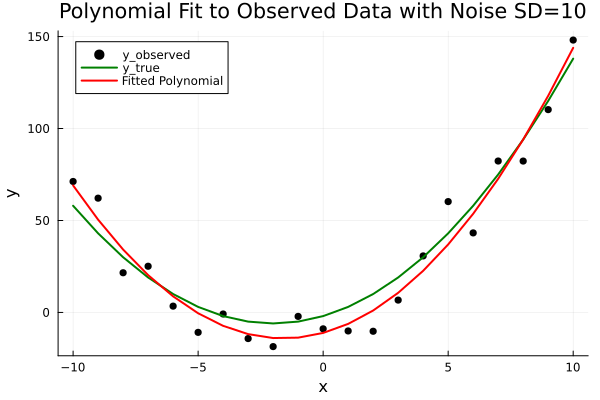

In [88]:
# 1. Fit the data (x, y_observed) with a second order polynomial
p = Polynomials.fit(Polynomial, x, y_observed, 2)  # Fit a second order polynomial

# 2 & 3. Create a scatter plot of y_observed along x & plot the fitted polynomial
scatter(x, y_observed, label="y_observed", color=:black, marker=:circle, title="Polynomial Fit to Observed Data with Noise SD=10", xlabel="x", ylabel="y")
plot!(x, y_true, label="y_true", color=:green, linewidth=2)  # Plot y_true
plot!(x, p.(x), label="Fitted Polynomial", color=:red, linewidth=2)  # Plot fitted polynomial

# Display the plot
plot!()

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 40

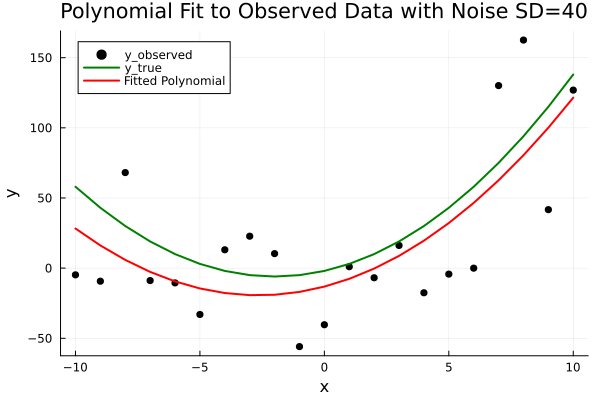

In [89]:
# 2.2(a) Generate Gaussian noise with zero mean and standard deviation of 40
noise = rand(Normal(0, 40), length(x))  # Generate noise

# 2.2(b) Add the noise to y_true to obtain y_observed
y_observed = y_true .+ noise  # y_observed = y_true + noise

# 2.3(a) Fit the data (x, y_observed) with a second order polynomial
p = Polynomials.fit(Polynomial, x, y_observed, 2)  # Fit a second order polynomial

# 2.3(b) Create a scatter plot of y_observed along x
scatter(x, y_observed, label="y_observed", color=:black, marker=:circle, title="Polynomial Fit to Observed Data with Noise SD=40", xlabel="x", ylabel="y")
plot!(x, y_true, label="y_true", color=:green, linewidth=2)  # Plot y_true
plot!(x, p.(x), label="Fitted Polynomial", color=:red, linewidth=2)  # Plot fitted polynomial

# Finalize the plot for display
plot!()

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

This analysis investigates the impact of Gaussian noise on the fitting of a quadratic polynomial to observed data. We generated an independent variable 
𝑥 ranging from -10 to 10 and computed the true value:

\begin{equation}
y_{\text{true}} = x^2 + 4x - 2
\end{equation}

Two sets of observations were created by adding Gaussian noise with different standard deviations: 10 and 40. The observed values were then used to fit a second-order polynomial.

The comparison of the two polynomial fits revealed that the fit with a standard deviation of 10 closely approximates y_true, demonstrating a more accurate representation of the underlying relationship. In contrast, the fit with a standard deviation of 40 exhibited significant deviations from the true curve due to the increased noise level. This leads to poorer model performance.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


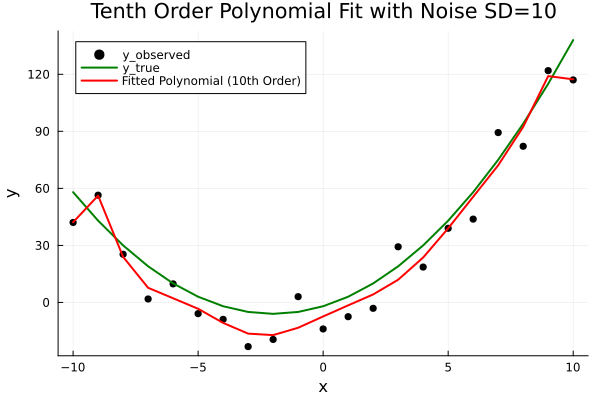

In [90]:
# 2.5(a) Generate Gaussian noise with zero mean and standard deviation of 10
noise = rand(Normal(0, 10), length(x))  # Generate noise

# 2.5(b) Add the noise to y_true to obtain y_observed
y_observed = y_true .+ noise  # y_observed = y_true + noise

# 2.5(c) Fit the data (x, y_observed) with a tenth order polynomial
p = Polynomials.fit(Polynomial, x, y_observed, 10)  # Fit a tenth order polynomial

# 2.5(d) Create a scatter plot of y_observed along x
scatter(x, y_observed, label="y_observed", color=:black, marker=:circle, 
        title="Tenth Order Polynomial Fit with Noise SD=10", 
        xlabel="x", ylabel="y")
plot!(x, y_true, label="y_true", color=:green, linewidth=2)  # Plot y_true
plot!(x, p.(x), label="Fitted Polynomial (10th Order)", color=:red, linewidth=2)  # Plot fitted polynomial

# Finalize the plot for display
plot!()

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.2
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


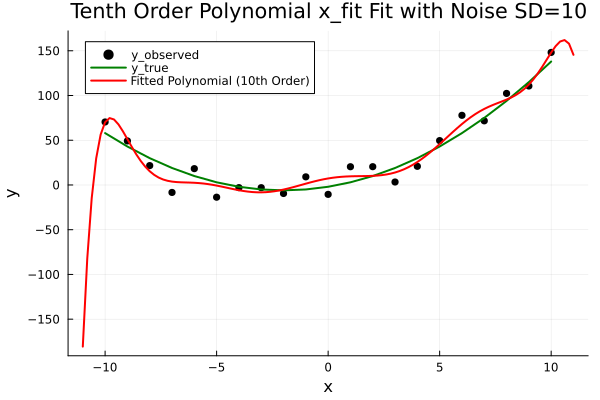

In [91]:
# 2.6(a) Generate Gaussian noise with zero mean and standard deviation of 40
noise = rand(Normal(0, 10), length(x))  # Generate noise

# 2.6(b) Add the noise to y_true to obtain y_observed
y_observed = y_true .+ noise  # y_observed = y_true + noise

# 2.6(c) Fit the data (x, y_observed) with a tenth order polynomial
p = Polynomials.fit(Polynomial, x, y_observed, 10)  # Fit a tenth order polynomial

# 2.6(d) Create a new independent parameter x_fit
x_fit = -11:0.2:11  # Range from -11 to 11 with an increment of 0.2

# 2.6(e) Create a scatter plot of y_observed along x
scatter(x, y_observed, label="y_observed", color=:black, marker=:circle, 
        title="Tenth Order Polynomial x_fit Fit with Noise SD=10", 
        xlabel="x", ylabel="y")
plot!(x, y_true, label="y_true", color=:green, linewidth=2)  # Plot y_true
plot!(x_fit, p.(x_fit), label="Fitted Polynomial (10th Order)", color=:red, linewidth=2)  # Plot fitted polynomial using x_fit

# Finalize the plot for display
plot!()

3. What do you observe in the plot? What is this phenomenon called?

This phenomenon is commonly referred to as 'overfitting'. Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise. While such a model may perform well on the training data, it often fails to generalize to new data leading to poor predictive performance.